# Exploratory Data Analysis 
with zomato dataset 

In [61]:
# importing libraries 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import matplotlib as mpl
mpl.rcParams['figure.figsize']=(12,6)

In [2]:
#importing the data
data=pd.read_csv('data/zomato.csv',encoding='latin-1')
data_country=pd.read_excel('data/country-code.xlsx')
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
data_country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [5]:
#merging the two datasets
dataset=data.merge(data_country, how='left',on='Country Code')

In [6]:
# we display the information of the dataset 
dataset.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

the dataset has 9551 rows and 22 numerical + categorical columns 

In [7]:
dataset.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [8]:
n_categorical_var=len([i for i in range(len(dataset.dtypes)) if str(dataset.dtypes[i]) =='object'])
n_num_var=len(dataset.columns)-n_categorical_var
print('Number of categorical variables: {}\nNumber of numerical variables: {}'.format(n_categorical_var,n_num_var))

Number of categorical variables: 14
Number of numerical variables: 8


### Handling missing values 

In [10]:
#counting the number of missing values for each column 
dataset.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [12]:
#writing a list comprehension to identify the columns with missing values 
[col for col in dataset.columns if dataset[col].isnull().sum()>0]

['Cuisines']

<Axes: >

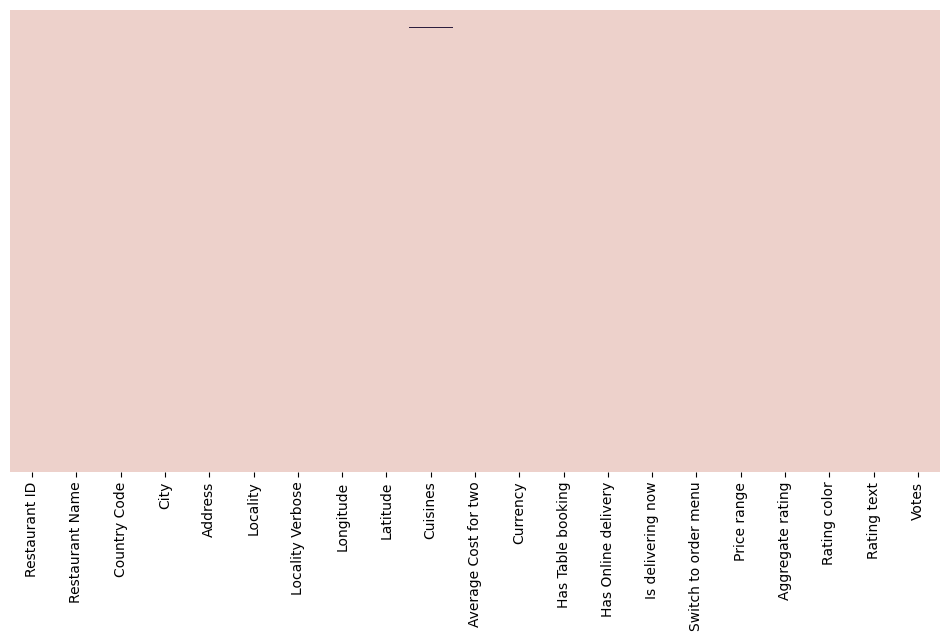

In [62]:
# we can also use heatmap.
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap=sns.cubehelix_palette(as_cmap=True))

In [94]:
#displaying the rows with nan values 
idx=dataset.isnull().any(axis=1)
dataset[idx]

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country,Cuisines2
84,17284105,Cookie Shoppe,216,Albany,"115 N Jackson St, Albany, GA 31701",Albany,"Albany, Albany",-84.154000,31.577200,NaN,...,No,No,No,1,3.4,Orange,Average,34,United States,[nan]
87,17284211,Pearly's Famous Country Cookng,216,Albany,"814 N Slappey Blvd, Albany, GA 31701",Albany,"Albany, Albany",-84.175900,31.588200,NaN,...,No,No,No,1,3.4,Orange,Average,36,United States,[nan]
94,17284158,Jimmie's Hot Dogs,216,Albany,"204 S Jackson St, Albany, GA 31701",Albany,"Albany, Albany",-84.153400,31.575100,NaN,...,No,No,No,1,3.9,Yellow,Good,160,United States,[nan]
297,17374552,Corkscrew Cafe,216,Gainesville,"51 W Main St, Dahlonega, GA 30533",Dahlonega,"Dahlonega, Gainesville",-83.985800,34.531800,NaN,...,No,No,No,3,3.9,Yellow,Good,209,United States,[nan]
328,17501439,Dovetail,216,Macon,"543 Cherry St, Macon, GA 31201",Macon,"Macon, Macon",-83.627979,32.836410,NaN,...,No,No,No,3,3.8,Yellow,Good,102,United States,[nan]
346,17606621,HI Lite Bar & Lounge,216,Miller,"109 N Broadway Ave, Miller, SD 57362",Miller,"Miller, Miller",-98.989100,44.515800,NaN,...,No,No,No,1,3.4,Orange,Average,11,United States,[nan]
368,17059060,Hillstone,216,Orlando,"215 South Orlando Avenue, Winter Park, FL 32789",Winter Park,"Winter Park, Orlando",-81.365260,28.596682,NaN,...,No,No,No,3,4.4,Green,Very Good,1158,United States,[nan]
418,17142698,Leonard's Bakery,216,Rest of Hawaii,"933 Kapahulu Ave, Honolulu, HI 96816",Kaimuki,"Kaimuki, Rest of Hawaii",-157.813432,21.284586,NaN,...,No,No,No,1,4.7,Dark Green,Excellent,707,United States,[nan]
455,17616465,Tybee Island Social Club,216,Savannah,"1311 Butler Ave, Tybee Island, GA 31328",Tybee Island,"Tybee Island, Savannah",-80.848297,31.995810,NaN,...,No,No,No,1,3.9,Yellow,Good,309,United States,[nan]


In [93]:
print('The percentage of missing values in Cuisines column is: ' +str(round(len(dataset[idx])/len(dataset)*100,1))+'%')

The percentage of missing values in Cuisines column is: 0.1%


In [98]:
# we will just drop the rows with missing values as it prepresents a very small percentage of our data
dataset.dropna(inplace=True )
dataset.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
Cuisines2               0
dtype: int64

### Displaying the top three countries with the highest number of transactions 

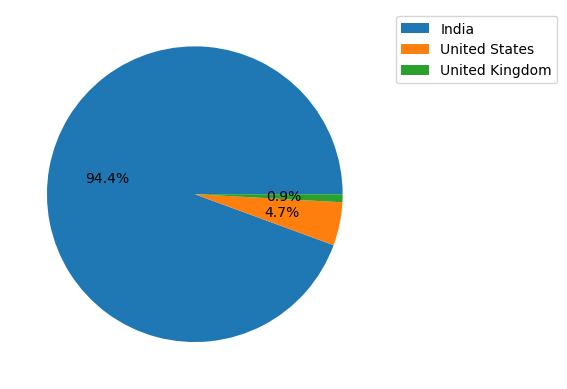

In [15]:

countries=dataset.Country.value_counts(dropna=True).index
indx=dataset.Country.value_counts(dropna=True).values#index for the name of the countries

plt.pie(indx[:3],autopct='%1.1f%%')
plt.legend(countries[:3],loc='upper right',
          bbox_to_anchor=(1,0,0.5,1))

[Text(0, 0, '8652'), Text(0, 0, '434'), Text(0, 0, '80')]

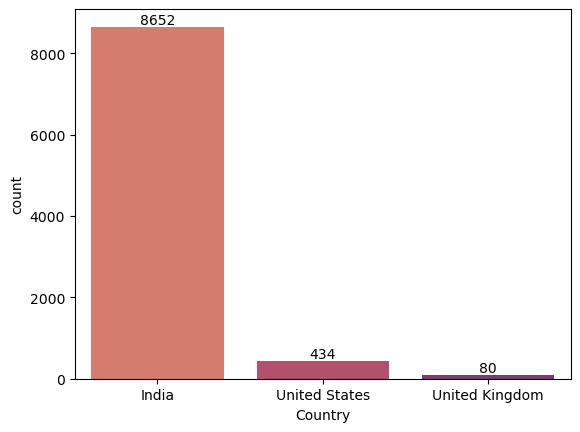

In [16]:
#using seaborn to plot the top three countries per number of transactions 

bar=sns.countplot(x=dataset.Country,
                  order=dataset.Country.value_counts().index[:3]
                 , palette='flare')
bar.bar_label(bar.containers[0])

On the graphs we can see the top three countries with the highest transactions recorded. India is responsible for the majority of the transacctions followed by USA and UK

### Displaying the count of transacctions per aggregate rating and the percentage of ratings per class

In [17]:
ratings=dataset.groupby(['Aggregate rating','Rating color', 'Rating text']).size().reset_index().rename(columns={0:'Count rating'})
ratings.head()

,Aggregate rating,Rating color,Rating text,Count rating
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15


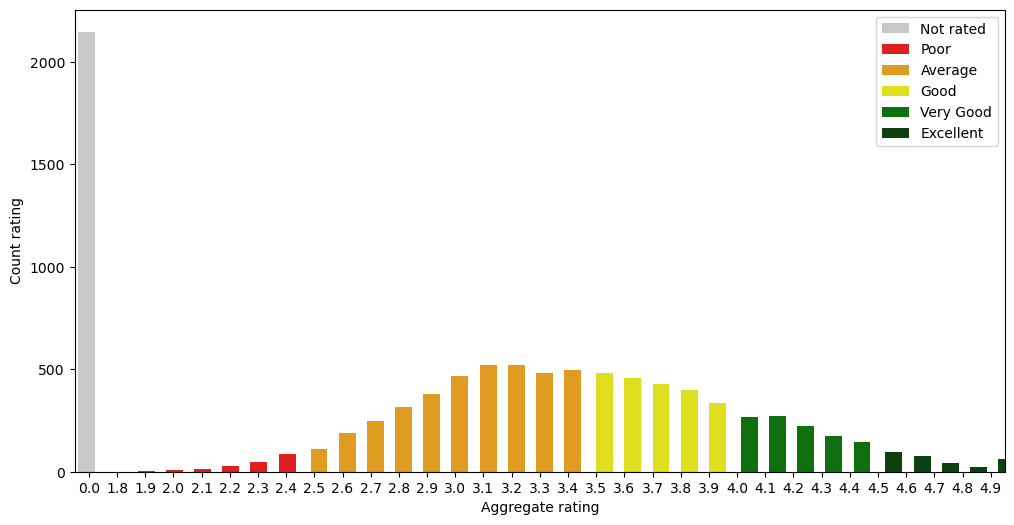

In [102]:

#plt.style.use('ggplot')
ax=sns.barplot(data=ratings,
               y='Count rating',
               x='Aggregate rating',
               hue='Rating text',
               errorbar=None,
               palette=['#c5c9c7','red','orange','yellow','green','#054907'])
#changing the width of the bars 
for patch in ax.patches:
    patch.set_width(0.6)
plt.legend(loc='upper right')
 

Text(0.5, 1.0, '% of the ratings per class')

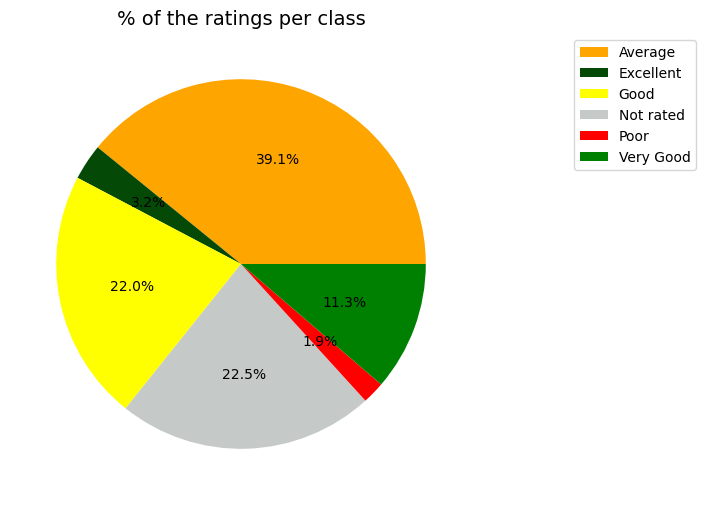

In [19]:
txt=ratings[['Rating text','Count rating']].groupby('Rating text').sum().reset_index()
ax=plt.pie(x=txt['Count rating'],
       autopct='%1.1f%%',
       colors=['orange','#054907','yellow','#c5c9c7','red','green'])
plt.legend(txt['Rating text'],loc='upper right',
          bbox_to_anchor=(1,0,0.5,1))
plt.title('% of the ratings per class',fontsize=14)

- The highest number of ratings are between 2.6 and 3.4
- Nearly a quarter of the transacctions are not rated.
- Over 60% of the transacctions are classified as average or good 
- A small percentage of transactiosn are classified as poor (nearly 2%) and excellente(around 3%)

### Mean of ratings per price range

In [27]:
# firstly we remove not rated rows as it will affect the mean aggregate rating 
dataset1=dataset[dataset['Rating text']!='Not rated']
dataset1[['Price range','Aggregate rating']].groupby(['Price range']).mean()

,Aggregate rating
Price range,
1,3.238885
2,3.377167
3,3.777276
4,3.890957


we can say that the fact that the price is high does not contribute to bad reviews. Actually, the restaurants with high price range have in average better reviews that the restaurants with lower price range and it might be a reflection of quality in the food, service or installations.

### Top ten cuisines 

In [20]:
from itertools import chain

#splitting the values for cuisines column and creating a list of them. We need
#to lower the strings as if we dont there will be repeated names for the same cuisine
#removing trailing and leading spaces
lst_cuisines=set(chain.from_iterable([[str.lower(s.strip()) for s in str(c).split(',')] for c in list(dataset.Cuisines.unique())]))
fun=lambda x: [str.lower(s.strip()) for s in str(x).split(',')] 
count_cuisines={}
dataset['Cuisines2']=dataset.Cuisines.apply(fun)
for c in lst_cuisines:
    df=dataset['Cuisines2'].apply(lambda x,c: 1 if c in x else 0,args=(c,))
    count_cuisines[c]=df.sum()
count_cuisines=pd.Series(count_cuisines).sort_values(ascending=False)

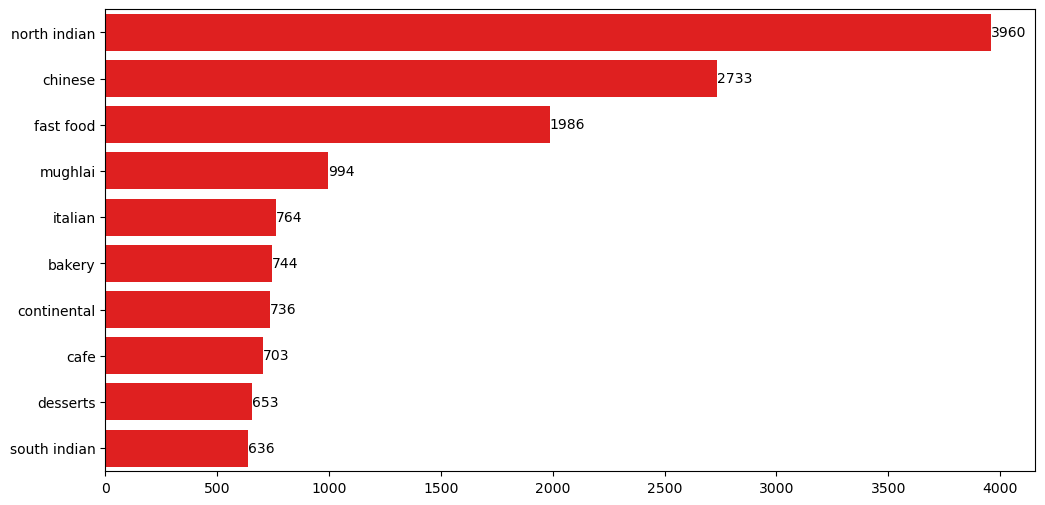

In [59]:
ax=sns.barplot(y=count_cuisines.index[:10],
               x=count_cuisines.values[:10],
               orient='h',
               errorbar=None,
              color='red')
ax.bar_label(ax.containers[0])
plt.show()

In the graph above we can see the top ten cuisines. We can say that the two favourites cuisines are North Indian and Chinese

### Impact of online delivery on Ratings 

In [31]:
dataset1=dataset[dataset['Rating text']!='Not rated']
dataset1[['Has Online delivery','Aggregate rating']].groupby('Has Online delivery').mean()

,Aggregate rating
Has Online delivery,
No,3.467433
Yes,3.381274


We cannot say that the fact that the restaurant has online delivery translates in better rating.


### Percentage of non-rated transactions for restaurants with and without online delivery

<Axes: ylabel='Has Online delivery'>

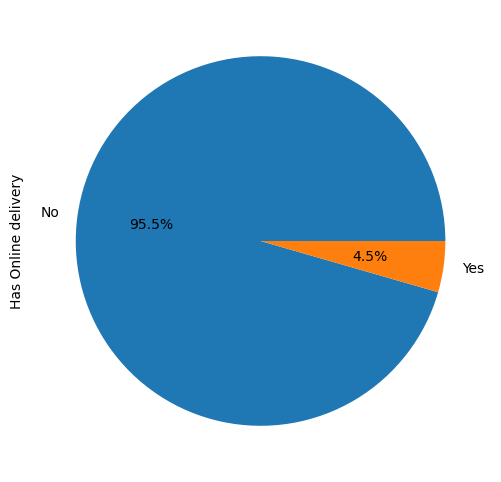

In [58]:
dataset[dataset['Rating text']=='Not rated'].groupby('Has Online delivery')['Has Online delivery'].size().plot(kind='pie',
                                                                                                             autopct='%1.1f%%')

The percentage of non rated transaction for restaurants that have online delivery is only 4.5%. The reason of this might be that when the customer make and order is prompted to rate their experience.

### Number of restaurants with online delivery

In [52]:
print('Number of unique restaurants: ', str(len(dataset['Restaurant ID'].unique())))
delivery=dataset.groupby('Has Online delivery')['Restaurant ID'].count()
delivery

Number of unique restaurants:  9551


Has Online delivery
No     7100
Yes    2451
Name: Restaurant ID, dtype: int64

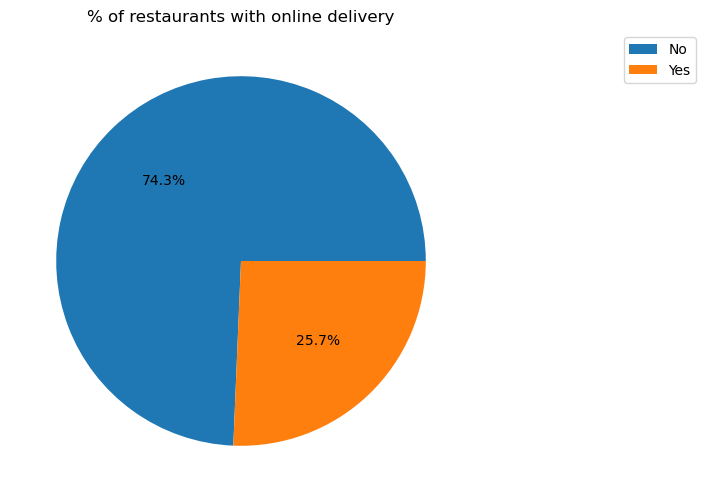

In [100]:
plt.pie(delivery,
        autopct='%1.1f%%')
plt.legend(['No','Yes'],loc='upper right',
          bbox_to_anchor=(1,0,0.5,1))
plt.title('% of restaurants with online delivery')
plt.show()

Nearly 75% of the restaurants dont have online delivery 

### Top ten best affordable restaurants with location 

In [113]:
best=dataset.sort_values(by=['Aggregate rating','Price range'],ascending=[False,True]).head(10)
best[['Restaurant Name','City','Rating text']]

,Restaurant Name,City,Rating text
175,Shorts Burger and Shine,Cedar Rapids/Iowa City,Excellent
213,Oakwood Cafe,Dalton,Excellent
324,Ingleside Village Pizza,Macon,Excellent
429,Marukame Udon,Rest of Hawaii,Excellent
507,Mazzaro's Italian Market,Tampa Bay,Excellent
637,Sheroes Hangout,Agra,Excellent
748,Sagar Gaire Fast Food,Bhopal,Excellent
2418,Grandson of Tunday Kababi,Lucknow,Excellent
3013,Naturals Ice Cream,New Delhi,Excellent
9303,Miann,Auckland,Excellent
